# Given : Sepal,Petal lengths and Width
End Goal: Predict the class of Iris

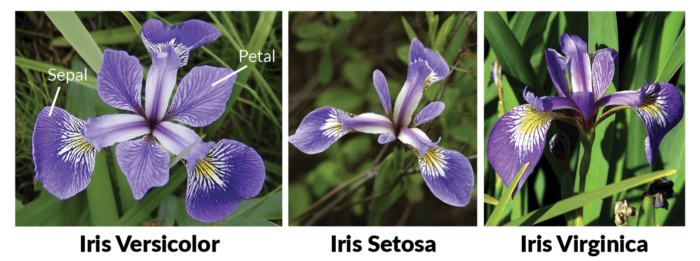

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)

# Loading Data

In [2]:
iris=pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop('Id',axis=1,inplace=True)#drop unecessary columns

In [5]:
#Obtaining class from species
def getSpecies(sp):
    cl=sp[5:]
    return cl.capitalize()
iris['Species']=iris['Species'].apply(getSpecies)

In [6]:
iris.head(1)#Good to go

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa


# EDA

In [7]:
iris.info()#150 rows of data with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris['Species'].value_counts()#50 rows for each class of species 

Virginica     50
Versicolor    50
Setosa        50
Name: Species, dtype: int64

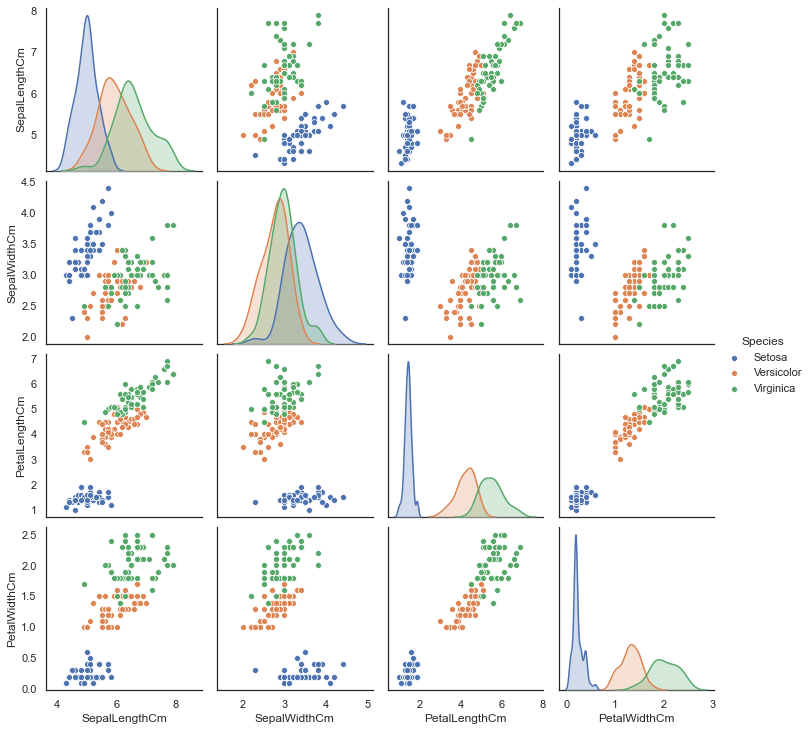

In [9]:
sns.pairplot(iris,hue="Species")

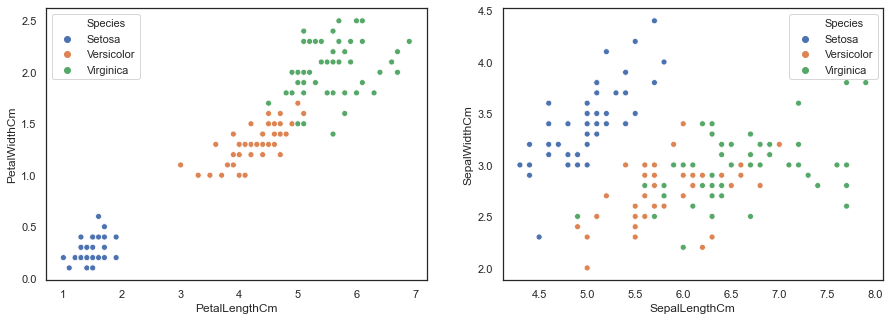

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(iris.PetalLengthCm,iris.PetalWidthCm,hue=iris.Species)
plt.subplot(1,2,2)
sns.scatterplot(iris.SepalLengthCm,iris.SepalWidthCm,hue=iris.Species)
plt.show()

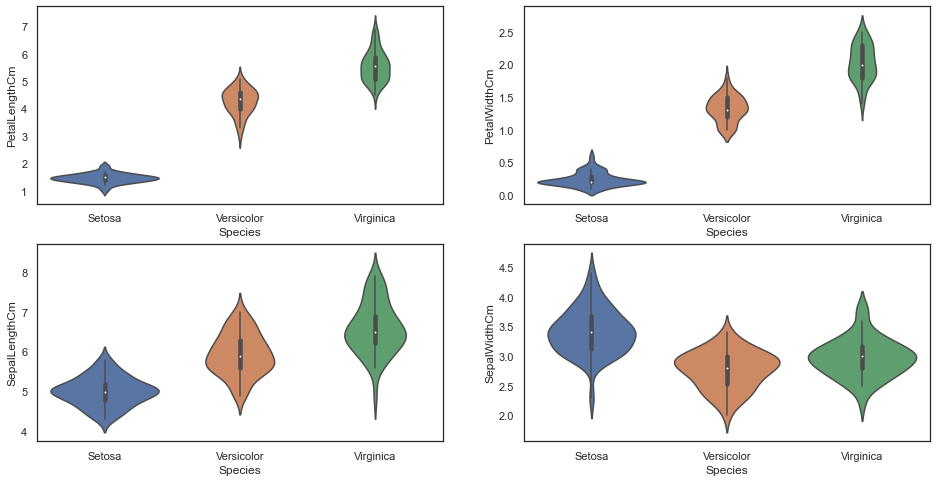

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.violinplot(iris.Species,iris.PetalLengthCm)
plt.subplot(2,2,2)
sns.violinplot(iris.Species,iris.PetalWidthCm)
plt.subplot(2,2,3)
sns.violinplot(iris.Species,iris.SepalLengthCm)
plt.subplot(2,2,4)
sns.violinplot(iris.Species,iris.SepalWidthCm)
plt.show()

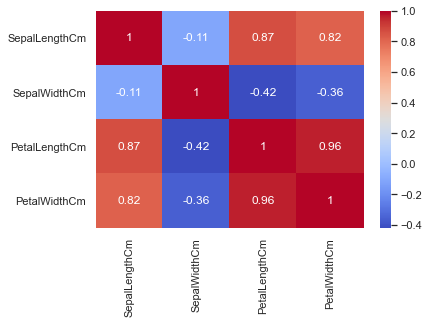

In [12]:
sns.heatmap(iris.corr(),annot=True,cmap="coolwarm")

1. Petal Width & Petal Length are highly correlated: 0.96 corr

2. Sepal Length is related to Petal Width & Length

# ML Model Implementation

This is a classification type problem

In [13]:
x=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import LabelEncoder
ecoder=LabelEncoder()
y=ecoder.fit_transform(y)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc

# Logistic Regression

In [28]:
lor=LogisticRegression()
lor.fit(x_train,y_train)
y_pred=lor.predict(x_test)
y_pred_train=lor.predict(x_train)

In [29]:
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(1.0, 0.975)

# SVM

In [30]:
svm=SVC(kernel="linear",C=1)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
y_pred_train=svm.predict(x_train)

In [31]:
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(1.0, 0.975)

# KNN

In [32]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [33]:
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(1.0, 0.9666666666666667)

# Decision Tree

In [34]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=3)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred_train=dt.predict(x_train)

In [35]:
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(1.0, 0.9583333333333334)